In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
%matplotlib inline

In [4]:
plt.rcParams["figure.figsize"] = (8,6)

In [5]:
num_dimensions = 2
num_samples = 1000
outlier_ratio = 0.01
num_inliers = int(num_samples * (1-outlier_ratio))
num_outliers = num_samples - num_inliers

In [6]:
# Generate the normally-distributed inliers
x = np.random.randn(num_inliers, num_dimensions)

# Add outliers sampled from a random uniform distribution
x_rand = np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))
x = np.r_[x, x_rand]

# Generate labels, 1 for inliers and -1 for outliers
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

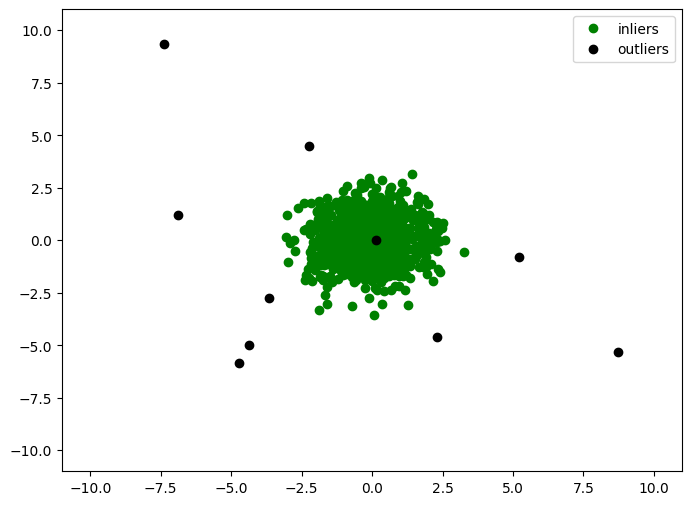

In [7]:
inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()

## Applying sklearn.covariance.EllipticEnvelope

In [8]:
from sklearn.covariance import EllipticEnvelope

classifier = EllipticEnvelope(contamination=outlier_ratio)
classifier.fit(x)
y_pred = classifier.predict(x)
num_errors = sum(y_pred != labels)
print('Number of errors: {}'.format(num_errors))

Number of errors: 2


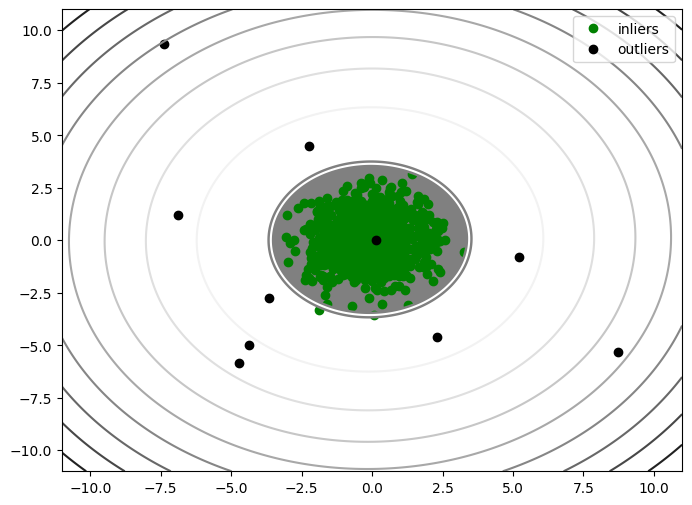

In [9]:
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold],linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')
plt.xlim(-11,11)
plt.ylim(-11,11)

plt.legend(numpoints=1)
plt.show()

## Example application on non-Gaussian distribution

In [10]:
x_0 = np.random.randn(num_inliers//3, num_dimensions) - 3
x_1 = np.random.randn(num_inliers//3, num_dimensions)
x_2 = np.random.randn(num_inliers//3, num_dimensions) + 4

# Add outliers sampled from a random uniform distribution
x = np.r_[x_0, x_1, x_2, np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))]

# Generate labels, 1 for inliers and -1 for outliers
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

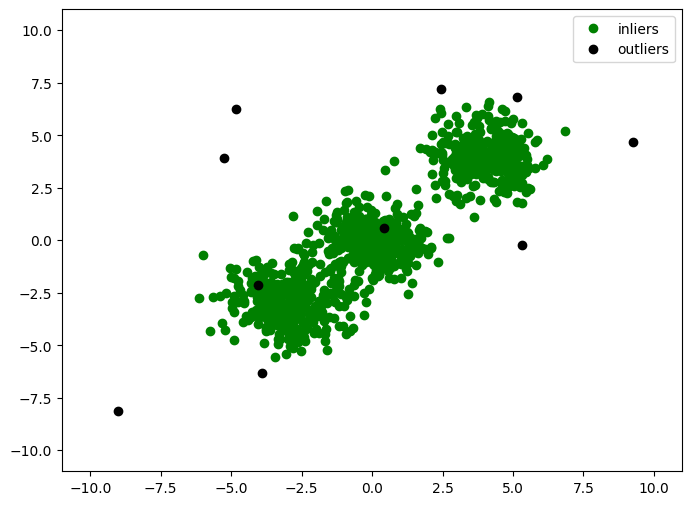

In [11]:
inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()

In [12]:
classifier = EllipticEnvelope(contamination=outlier_ratio)
classifier.fit(x)
y_pred = classifier.predict(x)
num_errors = sum(y_pred != labels)
print('Number of errors: {}'.format(num_errors))

Number of errors: 8


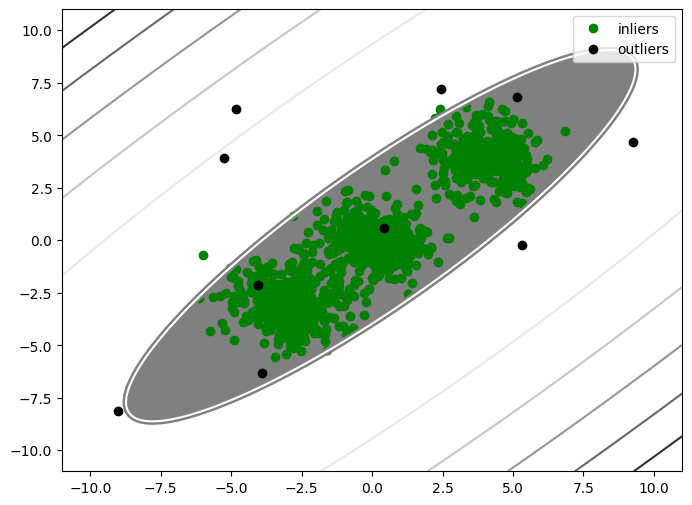

In [13]:
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold],linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')

plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()